# Use CNN and a Pre-trained model for image classification

---



In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [2]:
# load the dataset
base_dir = os.getcwd()

data_path = Path(base_dir) / "vegitable_fruit"

print(base_dir)

print(data_path)

filepaths = list(data_path.glob(r'**/*.jpg'))

/Users/ramihuunguyen/Documents/PhD/AIClass/HW2
/Users/ramihuunguyen/Documents/PhD/AIClass/HW2/vegitable_fruit


In [3]:
labels = [str(filepaths[i]).split("/")[-2] \
           for i in range(len(filepaths))]

filepaths = pd.Series(filepaths, name='Filepath').astype(str)

labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
df = df.sample(frac=1).reset_index(drop = True)

Lable_list = df.Label.unique()

no_classes = len(Lable_list)

In [4]:
print('-- The data set information --\n')
print(f'Number of pictures: {df.shape[0]}\n')
print(f'Number of different labels: {no_classes}\n')
print(f'Labels: {Lable_list}')

-- The data set information --

Number of pictures: 960

Number of different labels: 20

Labels: ['Fig' 'Khira' 'Spoung_Gourd' 'Tomato_Green' 'Onion' 'Tomato_Red'
 'Watermellon' 'Green_Orange' 'Straberry' 'Brinjal_Dotted' 'Green_Paper'
 'Red_Cabbage' 'Papper' 'SMG' 'Sapodilla' 'Chilli' 'Kiwi' 'Pomogranate'
 'Apple' 'Bitter_Melon']


In [5]:
df.head(5)

,Filepath,Label
0,/Users/ramihuunguyen/Documents/PhD/AIClass/HW2...,Fig
1,/Users/ramihuunguyen/Documents/PhD/AIClass/HW2...,Khira
2,/Users/ramihuunguyen/Documents/PhD/AIClass/HW2...,Spoung_Gourd
3,/Users/ramihuunguyen/Documents/PhD/AIClass/HW2...,Khira
4,/Users/ramihuunguyen/Documents/PhD/AIClass/HW2...,Spoung_Gourd


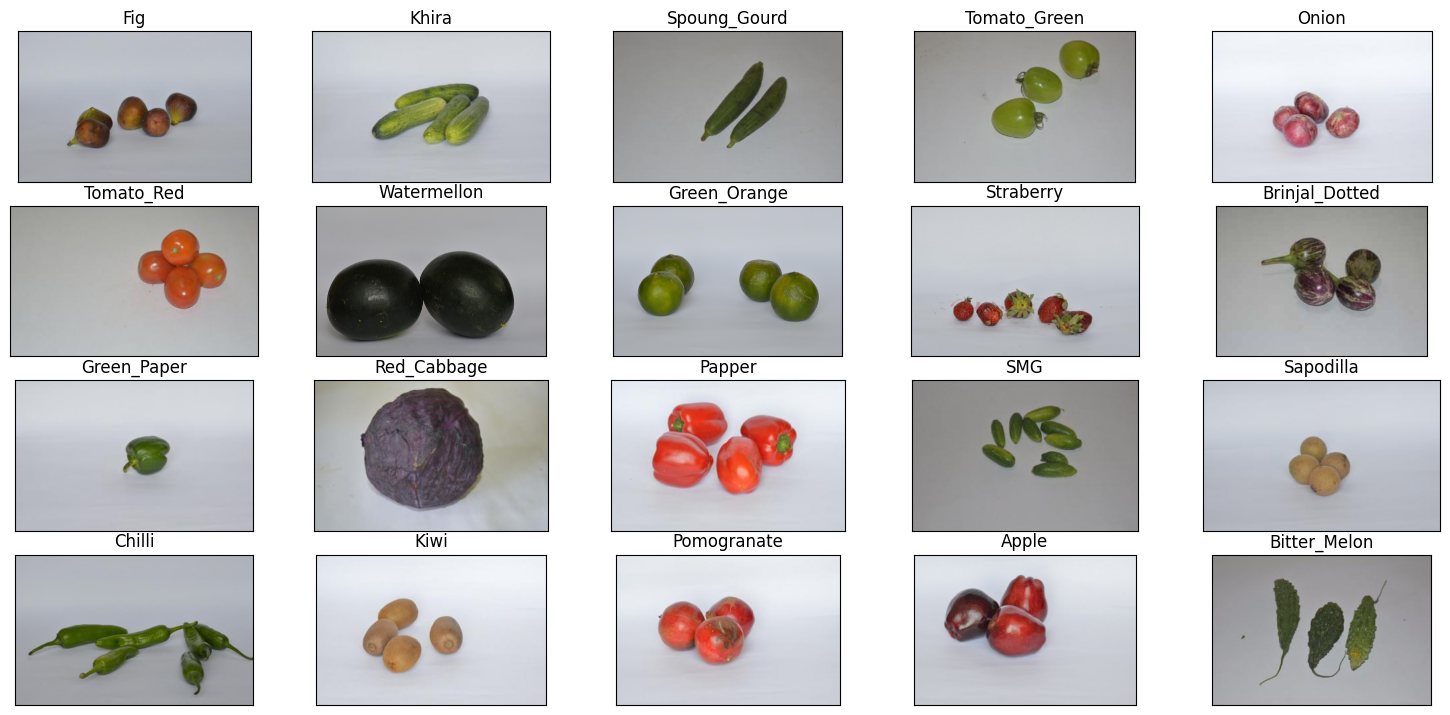

In [6]:
df_unique = df.copy().drop_duplicates(subset=["Label"]).reset_index()

K =df_unique.shape[0]  ## K = 20, the number of classes

# Display some pictures of the dataset, one for each class
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):

    ax.imshow(plt.imread(df_unique.Filepath[i]))
    
    ax.set_title(df_unique.Label[i], fontsize = 12)

plt.tight_layout(pad=0.15)
plt.show()


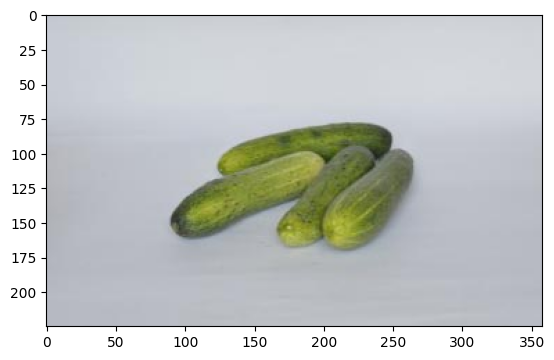

In [7]:
### check one image
plt.imshow(plt.imread(df['Filepath'].iloc[1]))
plt.show()

In [8]:
### the images have been shuffled, so we can use the first 200 for training, the next 200 for validation, the next 200 for testing
df_train=df.iloc[:200,]
df_validation=df.iloc[200:400,]
df_test=df.iloc[400:600,]

### check the class distribution in training data
df_train['Label'].value_counts()

Label
SMG               15
Fig               14
Spoung_Gourd      14
Onion             12
Watermellon       12
Kiwi              12
Khira             12
Straberry         11
Papper            11
Tomato_Green      10
Pomogranate       10
Chilli            10
Sapodilla         10
Bitter_Melon       9
Brinjal_Dotted     8
Green_Paper        8
Red_Cabbage        7
Tomato_Red         7
Green_Orange       6
Apple              2
Name: count, dtype: int64

In [9]:
### check the class distribution in testing data
df_test['Label'].value_counts()

Label
Watermellon       16
Green_Paper       16
Tomato_Red        14
Fig               13
Straberry         12
Red_Cabbage       12
Papper            11
Khira             11
Kiwi              10
Brinjal_Dotted     9
Onion              9
Bitter_Melon       9
SMG                9
Spoung_Gourd       8
Tomato_Green       8
Green_Orange       7
Sapodilla          7
Pomogranate        7
Chilli             6
Apple              6
Name: count, dtype: int64

In [10]:
### prepare the images for training, validation, and testing

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_images = train_generator.flow_from_dataframe(
    dataframe=df_train,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

validation_images = validation_generator.flow_from_dataframe(
    dataframe=df_validation,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

test_images = test_generator.flow_from_dataframe(
    dataframe=df_test,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 200 validated image filenames belonging to 20 classes.
Found 200 validated image filenames belonging to 20 classes.
Found 200 validated image filenames belonging to 20 classes.


# Build a CNN model for image classification

In [11]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam


# Define CNN model



In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# number of output classes
K = 20  

# --- Build CNN model from scratch ---
CNNmodel = Sequential([
    # Convolution block 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    
    # Convolution block 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Convolution block 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten and fully connected layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(K, activation='softmax')
])

# --- Compile the model ---
CNNmodel.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --- Train the model ---
history = CNNmodel.fit(
    train_images,
    validation_data=validation_images,
    epochs=5,
    batch_size=32
)


Epoch 1/5


/Users/ramihuunguyen/miniconda3/envs/visualization/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.0879 - loss: 3.7679 - val_accuracy: 0.0850 - val_loss: 2.7662
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.2554 - loss: 2.3760 - val_accuracy: 0.3200 - val_loss: 2.0965
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - accuracy: 0.4781 - loss: 1.6768 - val_accuracy: 0.5500 - val_loss: 1.6427
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 0.6229 - loss: 1.1532 - val_accuracy: 0.6350 - val_loss: 1.2002
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.8012 - loss: 0.6538 - val_accuracy: 0.6700 - val_loss: 1.2090


In [23]:
#1: 

CNNmodel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 20)             │         2,580 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,514,622 (127.85 MB)

 Trainable params: 11,171,540 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,343,082 (85.23 MB)

The model is a **Convolutional Neural Network (CNN)** designed to classify 20 types of fruits and vegetables. 

--> It extracts spatial features through three convolution–pooling blocks and then performs classification using dense layers.

* **Conv2D (32 filters, 3×3 kernel)**
  Learns low-level visual patterns like edges and simple textures.

  Each filter has 3×3×3 weights plus one bias → **32 × (27+1) = 896 parameters**.
  Output: 222×222×32 feature maps.

* **MaxPooling2D (2×2)**
  Reduces the spatial size to 111×111×32 while keeping important features.
  No trainable parameters.

* **Conv2D (64 filters, 3×3 kernel)**
  Captures mid-level patterns such as shapes or color blobs.
  Parameters = **64 × (3×3×32 + 1) = 18,496**.
  Output: 109×109×64.

* **MaxPooling2D (2×2)**
  Downsamples feature maps to 54×54×64, reducing computation.

* **Conv2D (128 filters, 3×3 kernel)**
  Detects high-level, complex patterns combining shapes and textures.
  Parameters = **128 × (3×3×64 + 1) = 73,856**.
  Output: 52×52×128.

* **MaxPooling2D (2×2)**
  Further reduces the size to 26×26×128 to prepare for classification.

* **Flatten**
  Converts 3D features into a 1D vector of length 86,528 (26×26×128).
  No parameters.

* **Dense (128 neurons, ReLU)**
  Fully connected layer learning global relationships among extracted features.
  Parameters = **(86,528 × 128) + 128 = 11,075,712**.

* **Dropout (rate=0.3)**
  Randomly drops 30% of neurons to prevent overfitting.
  No parameters.

* **Dense (20 neurons, Softmax)**
  Output layer that gives probabilities across 20 classes.
  Parameters = **(128 × 20) + 20 = 2,580**.


Total parameters:** 11,171,540
- Trainable:** 11,171,540
- Non-trainable:0
- Optimizer parameters (Adam): 22,343,082
- Output: Classification of 20 fruit and vegetable types.



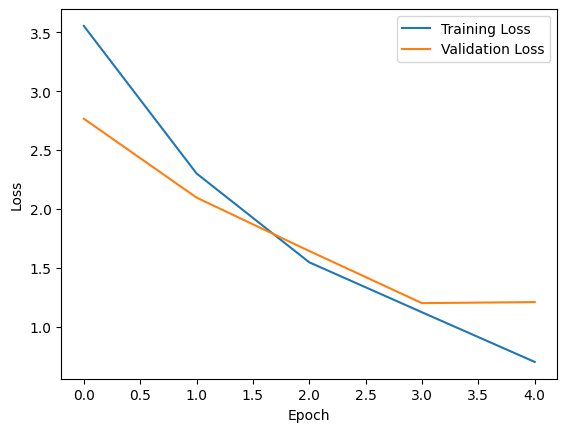

In [24]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


- The training and validation loss decreases steadily starting from the start to epoch 1.5, meaning the model keeps improving on training data.

- However, after epoch 1.5, a small gap appears: training loss continues to fall, while validation loss continues to decrease but surpass trainning loss. 

In [25]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

filepaths = 'my_best_model.h5'

checkpoint = ModelCheckpoint(
    filepath=filepaths,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

callbacks = [checkpoint]


In [26]:
history = CNNmodel.fit(
    train_images,
    validation_data=validation_images,
    epochs=5,
    callbacks=callbacks
)



Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.8564 - loss: 0.4649
Epoch 1: val_accuracy improved from -inf to 0.74000, saving model to my_best_model.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step - accuracy: 0.8556 - loss: 0.4688 - val_accuracy: 0.7400 - val_loss: 0.9960
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.9216 - loss: 0.3314
Epoch 2: val_accuracy did not improve from 0.74000
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.9233 - loss: 0.3295 - val_accuracy: 0.7100 - val_loss: 1.0557
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.9294 - loss: 0.2814
Epoch 3: val_accuracy did not improve from 0.74000
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - accuracy: 0.9332 - loss: 0.2700 - val_accuracy: 0.7300 - val_loss: 1.4074
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.9393 - loss: 0.4535
Epoch 4: val_accuracy did not improve from 0.74000
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.9406 - loss: 0.4306 - val_accuracy: 0.7200 - val_loss: 1.2454
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.9228 - loss: 0.2179
Epoch 5: val_accuracy improved from 0.74000 to 0.74500,

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - accuracy: 0.9224 - loss: 0.2215 - val_accuracy: 0.7450 - val_loss: 1.0626


In [27]:
CNN_best = load_model('my_best_model.h5')

test_loss, test_acc = CNN_best.evaluate(test_images)

print("Test Accuracy:", round(test_acc * 100, 2), "%")

/Users/ramihuunguyen/miniconda3/envs/visualization/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7767 - loss: 0.9753
Test Accuracy: 76.0 %


--> The model achieve 76% number of accuracy.

### Task 1.2

In [28]:
### the images have been shuffled, so we can use the first 200 for training, the next 200 for validation, the next 200 for testing
df_train=df.iloc[:500,]
df_validation=df.iloc[500:700,]
df_test=df.iloc[700:900,]

### check the class distribution in training data
df_train['Label'].value_counts()

### prepare the images for training, validation, and testing

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_images = train_generator.flow_from_dataframe(
    dataframe=df_train,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

validation_images = validation_generator.flow_from_dataframe(
    dataframe=df_validation,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

test_images = test_generator.flow_from_dataframe(
    dataframe=df_test,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

checkpoint = ModelCheckpoint('best_500_model.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')

history = CNNmodel.fit(train_images,
                    validation_data=validation_images,
                    epochs=5,
                    callbacks=[checkpoint])


Found 500 validated image filenames belonging to 20 classes.
Found 200 validated image filenames belonging to 20 classes.
Found 200 validated image filenames belonging to 20 classes.
Epoch 1/5


/Users/ramihuunguyen/miniconda3/envs/visualization/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.8287 - loss: 0.6615
Epoch 1: val_accuracy improved from -inf to 0.85500, saving model to best_500_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - accuracy: 0.8295 - loss: 0.6607 - val_accuracy: 0.8550 - val_loss: 0.4780
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9179 - loss: 0.2980
Epoch 2: val_accuracy did not improve from 0.85500
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.9171 - loss: 0.2989 - val_accuracy: 0.8500 - val_loss: 0.5597
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.9388 - loss: 0.1940
Epoch 3: val_accuracy improved from 0.85500 to 0.86000, saving model to best_500_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - accuracy: 0.9396 - loss: 0.1934 - val_accuracy: 0.8600 - val_loss: 0.4038
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.9561 - loss: 0.1273
Epoch 4: val_accuracy improved from 0.86000 to 0.88500, saving model to best_500_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - accuracy: 0.9568 - loss: 0.1263 - val_accuracy: 0.8850 - val_loss: 0.4004
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9829 - loss: 0.0503
Epoch 5: val_accuracy improved from 0.88500 to 0.91000, saving model to best_500_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - accuracy: 0.9828 - loss: 0.0508 - val_accuracy: 0.9100 - val_loss: 0.3551


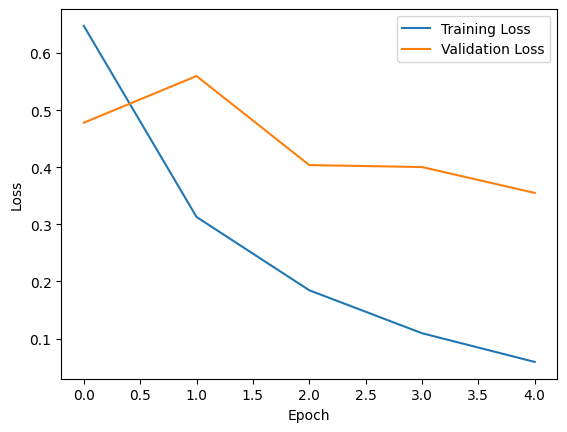

In [29]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


- No. It is overfitting. The trainning loss keeps going down, however, the validation loss is higher than trainning loss, and it is very fluctuated.

In [30]:
from keras.models import load_model
best_model = load_model('best_500_model.h5')
test_loss, test_acc = best_model.evaluate(test_images)
print("Test Accuracy:", round(test_acc*100,2), "%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8775 - loss: 0.4585
Test Accuracy: 89.5 %


- The test accuracy of the CNN model trained with 500 images is 89.5%.

- The CNN model trained with 500 images achieved about higher accuracy at 13.5% than the model trained with 200 images.

### Task 1.3: Pretrained Model

### 200 images

In [44]:
### the images have been shuffled, so we can use the first 200 for training, the next 200 for validation, the next 200 for testing
df_train=df.iloc[:200,]
df_validation=df.iloc[200:400,]
df_test=df.iloc[400:600,]

### check the class distribution in training data
df_train['Label'].value_counts()

### prepare the images for training, validation, and testing

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_images = train_generator.flow_from_dataframe(
    dataframe=df_train,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

validation_images = validation_generator.flow_from_dataframe(
    dataframe=df_validation,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

test_images = test_generator.flow_from_dataframe(
    dataframe=df_test,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

# classifier
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(20, activation='softmax')(x)
model = tf.keras.Model(inputs=pretrained_model.input, outputs=outputs)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Found 200 validated image filenames belonging to 20 classes.
Found 200 validated image filenames belonging to 20 classes.
Found 200 validated image filenames belonging to 20 classes.


In [45]:
model.summary()

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_11[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,441,044 (9.31 MB)

 Trainable params: 183,060 (715.08 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

First Dense layer:

- Input units = 1280

- Output units = 128

Parameters = (1280 × 128) + 128 (bias) = 163,968

Second Dense layer:

- Input units = 128

- Output units = 128

Parameters = (128 × 128) + 128 = 16,512

Output layer:

- Input units = 128

- Output units = 20

Parameters = (128 × 20) + 20 = 2,580

In [46]:
### the images have been shuffled, so we can use the first 200 for training, the next 200 for validation, the next 200 for testing
df_train=df.iloc[:200,]
df_validation=df.iloc[200:400,]
df_test=df.iloc[400:600,]

### check the class distribution in training data
df_train['Label'].value_counts()

### prepare the images for training, validation, and testing

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_images = train_generator.flow_from_dataframe(
    dataframe=df_train,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

validation_images = validation_generator.flow_from_dataframe(
    dataframe=df_validation,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

test_images = test_generator.flow_from_dataframe(
    dataframe=df_test,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

# classifier
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(20, activation='softmax')(x)
model = tf.keras.Model(inputs=pretrained_model.input, outputs=outputs)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


checkpoint = ModelCheckpoint('best_500_model.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
history = model.fit(train_images,
                    validation_data=validation_images,
                    epochs=5,
                    callbacks=[checkpoint])



Found 200 validated image filenames belonging to 20 classes.
Found 200 validated image filenames belonging to 20 classes.
Found 200 validated image filenames belonging to 20 classes.
Epoch 1/5


/Users/ramihuunguyen/miniconda3/envs/visualization/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.2180 - loss: 2.8137
Epoch 1: val_accuracy improved from -inf to 0.63500, saving model to best_500_model.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 257ms/step - accuracy: 0.2389 - loss: 2.7689 - val_accuracy: 0.6350 - val_loss: 1.7632
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8280 - loss: 1.2017
Epoch 2: val_accuracy improved from 0.63500 to 0.88500, saving model to best_500_model.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.8358 - loss: 1.1679 - val_accuracy: 0.8850 - val_loss: 0.8820
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9706 - loss: 0.3468
Epoch 3: val_accuracy improved from 0.88500 to 0.89000, saving model to best_500_model.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.9686 - loss: 0.3467 - val_accuracy: 0.8900 - val_loss: 0.5448
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9659 - loss: 0.1892
Epoch 4: val_accuracy improved from 0.89000 to 0.92500, saving model to best_500_model.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.9664 - loss: 0.1865 - val_accuracy: 0.9250 - val_loss: 0.3220
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9881 - loss: 0.0565
Epoch 5: val_accuracy improved from 0.92500 to 0.95500, saving model to best_500_model.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.9871 - loss: 0.0571 - val_accuracy: 0.9550 - val_loss: 0.1642


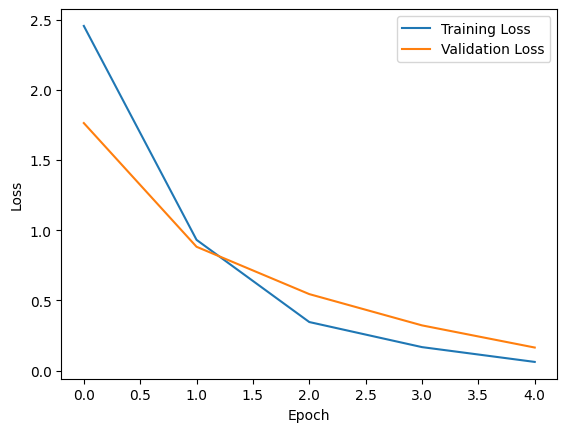

In [47]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

filepaths = 'my_best_model.h5'

checkpoint = ModelCheckpoint(
    filepath=filepaths,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

callbacks = [checkpoint]

history = model.fit(
    train_images,
    validation_data=validation_images,
    epochs=5,
    callbacks=callbacks
)

CNN_best = load_model('my_best_model.h5')

test_loss, test_acc = CNN_best.evaluate(test_images)

print("Test Accuracy:", round(test_acc * 100, 2), "%")


Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 1.0000 - loss: 0.0346
Epoch 1: val_accuracy improved from -inf to 0.99500, saving model to my_best_model.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 1.0000 - loss: 0.0345 - val_accuracy: 0.9950 - val_loss: 0.1177
Epoch 2/5
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 1.0000 - loss: 0.0290
Epoch 2: val_accuracy did not improve from 0.99500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 1.0000 - loss: 0.0284 - val_accuracy: 0.9800 - val_loss: 0.1135
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 1.0000 - loss: 0.0169
Epoch 3: val_accuracy did not improve from 0.99500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 1.0000 - loss: 0.0165 - val_accuracy: 0.9950 - val_loss: 0.0957
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 1.0000 - loss: 0.0132
Epoch 4: val_accuracy did not improve from 0.99500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 1.0000 - loss: 0.0128 - val_accuracy: 0.9950 - val_loss: 0.0715
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 1.0000 - loss: 0.0054
Epoch 5: val_accuracy did not improve from 0.99500
7/7 ━━━━

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.9882 - loss: 0.0993
Test Accuracy: 98.5 %


### 500 images

Found 500 validated image filenames belonging to 20 classes.
Found 200 validated image filenames belonging to 20 classes.
Found 200 validated image filenames belonging to 20 classes.
Epoch 1/5


/Users/ramihuunguyen/miniconda3/envs/visualization/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.3639 - loss: 2.4897
Epoch 1: val_accuracy improved from -inf to 0.95000, saving model to best_500_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 0.3771 - loss: 2.4542 - val_accuracy: 0.9500 - val_loss: 0.5422
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9476 - loss: 0.3355
Epoch 2: val_accuracy improved from 0.95000 to 0.98000, saving model to best_500_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.9479 - loss: 0.3295 - val_accuracy: 0.9800 - val_loss: 0.0878
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9874 - loss: 0.0719
Epoch 3: val_accuracy improved from 0.98000 to 0.99000, saving model to best_500_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.9876 - loss: 0.0709 - val_accuracy: 0.9900 - val_loss: 0.0421
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 1.0000 - loss: 0.0209
Epoch 4: val_accuracy improved from 0.99000 to 1.00000, saving model to best_500_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 1.0000 - loss: 0.0206 - val_accuracy: 1.0000 - val_loss: 0.0222
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 1.0000 - loss: 0.0087
Epoch 5: val_accuracy did not improve from 1.00000
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 1.0000 - loss: 0.0087 - val_accuracy: 1.0000 - val_loss: 0.0178


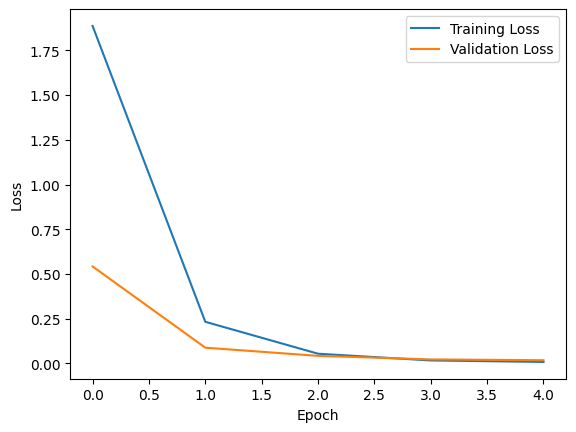

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 1.0000 - loss: 0.0137
Test Accuracy: 100.0 %


In [43]:
### the images have been shuffled, so we can use the first 200 for training, the next 200 for validation, the next 200 for testing
df_train=df.iloc[:500,]
df_validation=df.iloc[500:700,]
df_test=df.iloc[700:900,]

### check the class distribution in training data
df_train['Label'].value_counts()

### prepare the images for training, validation, and testing

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_images = train_generator.flow_from_dataframe(
    dataframe=df_train,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

validation_images = validation_generator.flow_from_dataframe(
    dataframe=df_validation,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

test_images = test_generator.flow_from_dataframe(
    dataframe=df_test,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

# classifier
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(20, activation='softmax')(x)
model = tf.keras.Model(inputs=pretrained_model.input, outputs=outputs)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


checkpoint = ModelCheckpoint('best_500_model.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
history = model.fit(train_images,
                    validation_data=validation_images,
                    epochs=5,
                    callbacks=[checkpoint])

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

from keras.models import load_model
best_model = load_model('best_500_model.h5')
test_loss, test_acc = best_model.evaluate(test_images)
print("Test Accuracy:", round(test_acc*100,2), "%")
